Question 3. Write a Python program that logs an error message to a log file when a division by zero exception occurs.

In [1]:
import logging
import os
from datetime import datetime

LOG_FILE = 'error_log.txt'

logging.basicConfig(
    level=logging.ERROR,
    format='%(asctime)s - %(levelname)s - %(message)s',
    filename=LOG_FILE,
    filemode='a'
)

console = logging.StreamHandler()
console.setLevel(logging.ERROR)
formatter = logging.Formatter('%(levelname)s: %(message)s')
console.setFormatter(formatter)
logging.getLogger('').addHandler(console)


def safe_divide(numerator, denominator):
    print(f"\nAttempting to calculate: {numerator} / {denominator}")
    
    try:
        result = numerator / denominator
        print(f"Result: {result}")
        return result
    
    except ZeroDivisionError:
        error_message = f"Division attempt failed: Tried to divide {numerator} by zero."
        
        logging.error(error_message, exc_info=True)
        
        print(f"--- ERROR LOGGED TO: {LOG_FILE} ---")
        print("A division by zero was detected and logged.")
        return None
    except TypeError:
        logging.error("Non-numeric input provided.", exc_info=True)
        print("Invalid input detected and logged.")
        return None


print("--- Start Division Program ---")

safe_divide(100, 5)

safe_divide(42, 0)

safe_divide(50, 10)

safe_divide(99, 0)

if os.path.exists(LOG_FILE) and os.path.getsize(LOG_FILE) > 0:
    print(f"\nSuccessfully recorded errors in '{LOG_FILE}'.")
else:
    print(f"\n'{LOG_FILE}' was created, but no errors were logged (check the code if you expected errors).")

print("--- End Division Program ---")

print(f"\n--- Contents of {LOG_FILE} (Last 3 entries only) ---")
try:
    with open(LOG_FILE, 'r') as f:
        lines = f.readlines()
        for line in lines[-3:]:
            print(line.strip())
except FileNotFoundError:
    pass


ERROR: Division attempt failed: Tried to divide 42 by zero.
Traceback (most recent call last):
  File "C:\Users\PRIYATOSH\AppData\Local\Temp\ipykernel_18524\3655506572.py", line 25, in safe_divide
    result = numerator / denominator
             ~~~~~~~~~~^~~~~~~~~~~~~
ZeroDivisionError: division by zero
ERROR: Division attempt failed: Tried to divide 99 by zero.
Traceback (most recent call last):
  File "C:\Users\PRIYATOSH\AppData\Local\Temp\ipykernel_18524\3655506572.py", line 25, in safe_divide
    result = numerator / denominator
             ~~~~~~~~~~^~~~~~~~~~~~~
ZeroDivisionError: division by zero


--- Start Division Program ---

Attempting to calculate: 100 / 5
Result: 20.0

Attempting to calculate: 42 / 0
--- ERROR LOGGED TO: error_log.txt ---
A division by zero was detected and logged.

Attempting to calculate: 50 / 10
Result: 5.0

Attempting to calculate: 99 / 0
--- ERROR LOGGED TO: error_log.txt ---
A division by zero was detected and logged.

Successfully recorded errors in 'error_log.txt'.
--- End Division Program ---

--- Contents of error_log.txt (Last 3 entries only) ---
result = numerator / denominator
~~~~~~~~~~^~~~~~~~~~~~~
ZeroDivisionError: division by zero


Question 4. Write a Python program that reads from one file and writes its content to another file. 

In [16]:
import os

def copy_file_contents(source_path: str, destination_path: str):
    print(f"Attempting to copy from '{source_path}' to '{destination_path}'...")
    
    try:
        with open(source_path, 'r') as source_file:
            content = source_file.read()
            
        with open(destination_path, 'w') as destination_file:
            destination_file.write(content)
            
        print("✅ File copy successful.")
        
    except FileNotFoundError:
        print(f"❌ Error: The source file '{source_path}' was not found.")
    except Exception as e:
        print(f"❌ An unexpected error occurred during file copy: {e}")

def create_source_file(path: str, content: str):
    print(f"\nSetting up source file at '{path}'...")
    try:
        with open(path, 'w') as f:
            f.write(content)
        print("Source file created successfully.")
    except Exception as e:
        print(f"Error creating source file: {e}")

def verify_destination_file(path: str):
    print(f"\n--- Verifying Content of '{path}' ---")
    try:
        if not os.path.exists(path):
            print(f"Verification Failed: Destination file '{path}' does not exist.")
            return

        with open(path, 'r') as f:
            content = f.read()
            print("Content:")
            print("-" * 20)
            print(content)
            print("-" * 20)
            
    except Exception as e:
        print(f"Error reading destination file: {e}")


if __name__ == "__main__":
    
    SOURCE_FILE = "source.txt"
    DESTINATION_FILE = "destination.txt"
    
    initial_content = (
        "This is the content of the source file.\n"
        "It contains multiple lines.\n"
        "And will be exactly copied to the destination."
    )
    create_source_file(SOURCE_FILE, initial_content)

    copy_file_contents(SOURCE_FILE, DESTINATION_FILE)
    
    verify_destination_file(DESTINATION_FILE)



Setting up source file at 'source.txt'...
Source file created successfully.
Attempting to copy from 'source.txt' to 'destination.txt'...
✅ File copy successful.

--- Verifying Content of 'destination.txt' ---
Content:
--------------------
This is the content of the source file.
It contains multiple lines.
And will be exactly copied to the destination.
--------------------


Question 5. Write a program that handles both IndexError and KeyError using a try-except block. 

In [17]:
import sys

def safe_data_access(data_list, data_dict, index_to_check, key_to_check):
    print(f"\n--- Attempting Access (Index: {index_to_check}, Key: '{key_to_check}') ---")

    try:
        list_value = data_list[index_to_check]
        print(f"List access successful: Index {index_to_check} = {list_value}")

        dict_value = data_dict[key_to_check]
        print(f"Dictionary access successful: Key '{key_to_check}' = {dict_value}")

    except (IndexError, KeyError) as e:
        print(f"!!! Error Caught: {type(e).__name__} !!!")
        print(f"Description: {e}")
        print("This operation failed because we tried to access an out-of-bounds index (IndexError)")
        print("or a non-existent key (KeyError) in the data structure.")

    except Exception as e:
        print(f"An unexpected error occurred: {e}")


my_list = [10, 20, 30]
my_dict = {"apple": 5, "banana": 10}

print("--- Case 1: Successful Access ---")
safe_data_access(my_list, my_dict, 1, "apple")

print("\n" + "="*50)
print("--- Case 2: Triggering IndexError ---")
safe_data_access(my_list, my_dict, 5, "apple")

print("\n" + "="*50)
print("--- Case 3: Triggering KeyError ---")
safe_data_access(my_list, my_dict, 0, "grape")

print("\n" + "="*50)
print("--- Script finished ---")

--- Case 1: Successful Access ---

--- Attempting Access (Index: 1, Key: 'apple') ---
List access successful: Index 1 = 20
Dictionary access successful: Key 'apple' = 5

--- Case 2: Triggering IndexError ---

--- Attempting Access (Index: 5, Key: 'apple') ---
!!! Error Caught: IndexError !!!
Description: list index out of range
This operation failed because we tried to access an out-of-bounds index (IndexError)
or a non-existent key (KeyError) in the data structure.

--- Case 3: Triggering KeyError ---

--- Attempting Access (Index: 0, Key: 'grape') ---
List access successful: Index 0 = 10
!!! Error Caught: KeyError !!!
Description: 'grape'
This operation failed because we tried to access an out-of-bounds index (IndexError)
or a non-existent key (KeyError) in the data structure.

--- Script finished ---


Question 8. Create a histogram using Seaborn to visualize a distribution.

First 5 rows of the tips dataset:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Info about the tips dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


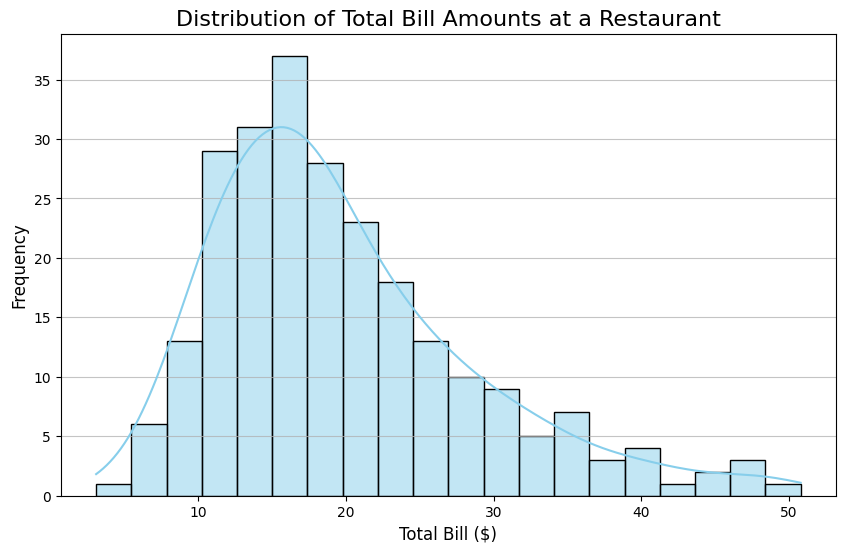

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("tips")

print("First 5 rows of the tips dataset:")
print(df.head())
print("\nInfo about the tips dataset:")
df.info()

plt.figure(figsize=(10, 6))

sns.histplot(data=df, x="total_bill", kde=True, bins=20, color='skyblue')

plt.title('Distribution of Total Bill Amounts at a Restaurant', fontsize=16)
plt.xlabel('Total Bill ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.grid(axis='y', alpha=0.75)

plt.show()


Question 9. Use Pandas to load a CSV file and display its first 5 rows.

In [ ]:
import pandas as pd

file_path = 'C:\\Users\\PRIYATOSH\\Desktop\\data.csv'

try:
    df = pd.read_csv(file_path)
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the file path.")

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


Question 10. Calculate the correlation matrix using Seaborn and visualize it with a heatmap. 

Correlation Matrix:
             total_bill       tip      size
total_bill    1.000000  0.856595  0.213523
tip           0.856595  1.000000  0.587150
size          0.213523  0.587150  1.000000


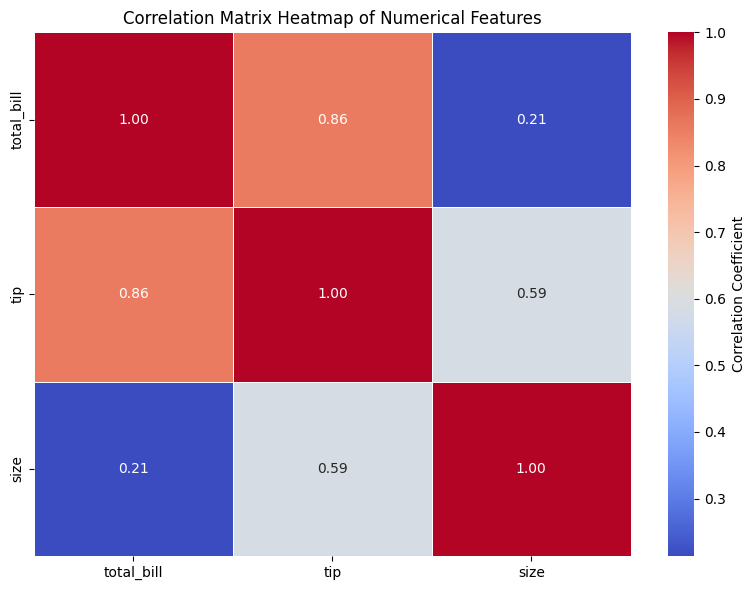

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('C:\\Users\\PRIYATOSH\\Desktop\\data.csv')

numerical_df = df[['total_bill', 'tip', 'size']]

correlation_matrix = numerical_df.corr()

print("Correlation Matrix:\n", correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Matrix Heatmap of Numerical Features')
plt.tight_layout()

plt.savefig('correlation_heatmap.png')
plt.show()